In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models


# Hyperparameters
imgs = 256
bsize = 32
channels = 3
epochs = 50
n_classes = 3

# Load dataset
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Traning_img",
    shuffle=True,
    image_size=(imgs, imgs),
    batch_size=bsize
)

# Partition dataset
def get_dataset_partitions(ds, train_part=0.8, val_part=0.1, test_part=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    ds_size = len(ds)
    train_size = int(train_part * ds_size)
    val_size = int(val_part * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions(ds)

# Cache and prefetch datasets for performance
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Define data preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(imgs, imgs),
    layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Define input shape
input_shape = (imgs, imgs, channels)

# Build model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train model
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=2
)


Found 2152 files belonging to 3 classes.
Epoch 1/50
54/54 - 182s - loss: 1.0791 - accuracy: 0.6719 - val_loss: 0.3918 - val_accuracy: 0.8542 - 182s/epoch - 3s/step
Epoch 2/50
54/54 - 16s - loss: 0.3096 - accuracy: 0.8773 - val_loss: 0.3861 - val_accuracy: 0.8542 - 16s/epoch - 303ms/step
Epoch 3/50
54/54 - 10s - loss: 0.2103 - accuracy: 0.9214 - val_loss: 0.2019 - val_accuracy: 0.9219 - 10s/epoch - 190ms/step
Epoch 4/50
54/54 - 10s - loss: 0.1655 - accuracy: 0.9349 - val_loss: 0.4120 - val_accuracy: 0.8594 - 10s/epoch - 189ms/step
Epoch 5/50
54/54 - 10s - loss: 0.1590 - accuracy: 0.9378 - val_loss: 0.3082 - val_accuracy: 0.9062 - 10s/epoch - 186ms/step
Epoch 6/50
54/54 - 10s - loss: 0.1157 - accuracy: 0.9595 - val_loss: 0.1198 - val_accuracy: 0.9635 - 10s/epoch - 186ms/step
Epoch 7/50
54/54 - 10s - loss: 0.1334 - accuracy: 0.9489 - val_loss: 0.3225 - val_accuracy: 0.8802 - 10s/epoch - 191ms/step
Epoch 8/50
54/54 - 10s - loss: 0.0994 - accuracy: 0.9630 - val_loss: 0.1779 - val_accuracy: 

In [6]:
score=model.evaluate(test_ds)
model.save("model")

8/8 [==============================] - 3s 53ms/step - loss: 0.2425 - accuracy: 0.9397


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [8]:
score

[0.2424566000699997, 0.9396551847457886]

In [9]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
54/54 [==============================] - 19s 338ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.1245 - val_accuracy: 0.9479
Epoch 2/50
54/54 [==============================] - 10s 189ms/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 0.1989 - val_accuracy: 0.9323
Epoch 3/50
54/54 [==============================] - 10s 188ms/step - loss: 0.0417 - accuracy: 0.9847 - val_loss: 0.1215 - val_accuracy: 0.9427
Epoch 4/50
54/54 [==============================] - 10s 190ms/step - loss: 0.0292 - accuracy: 0.9894 - val_loss: 0.1180 - val_accuracy: 0.9479
Epoch 5/50
54/54 [==============================] - 10s 192ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0844 - val_accuracy: 0.9688
Epoch 6/50
54/54 [==============================] - 10s 188ms/step - loss: 0.0198 - accuracy: 0.9912 - val_loss: 0.0335 - val_accuracy: 0.9896
Epoch 7/50
54/54 [==============================] - 10s 188ms/step - loss: 0.0378 - accuracy: 0.9847 - val_loss: 0.1863 - val_accuracy: 0.9375

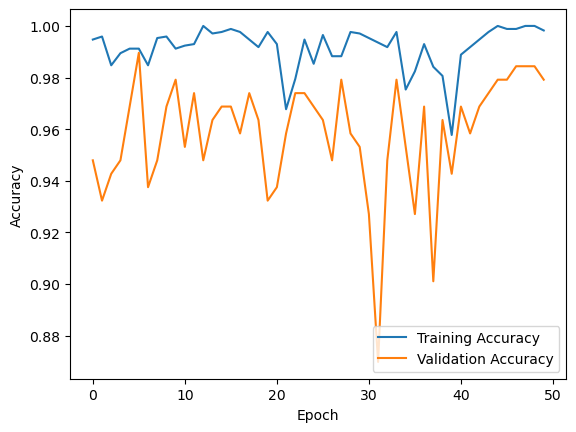

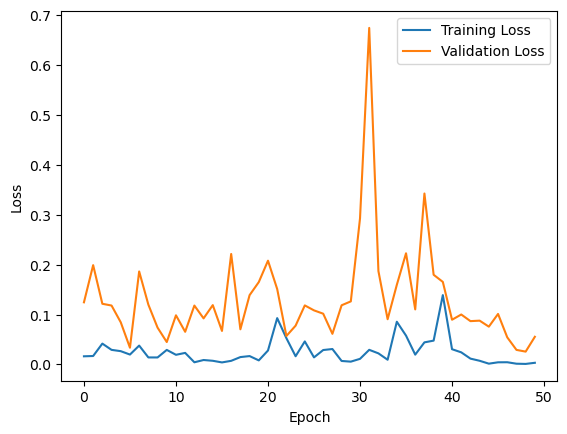

In [10]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Displaying a randomly selected image from the batch:


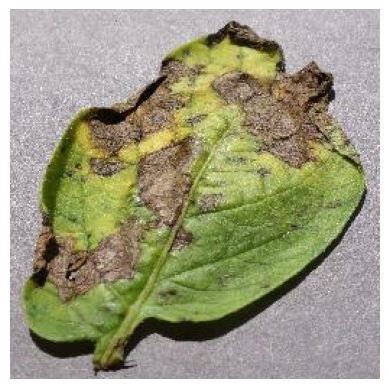

Actual Label: Potato___Early_blight
1/1 [==============================] - 0s 250ms/step
Predicted Label: Potato___Early_blight


In [11]:
import numpy as np
import matplotlib.pyplot as plt
class_names = ds.class_names
# Iterate through batches in the dataset
for img, label in test_ds.take(1):  # Adjust the number here to see more or fewer random images
    # Select a random index within the batch
    random_index = np.random.randint(0, img.shape[0])

    # Retrieve the randomly selected image and label from the batch
    random_image = img[random_index].numpy().astype('uint8')
    random_label = label[random_index].numpy()

    # Display the selected image
    print("Displaying a randomly selected image from the batch:")
    plt.imshow(random_image)
    plt.axis("off")
    plt.show()
    
    # Print the actual label
    print("Actual Label:", class_names[random_label])
  
    # Predict on the entire batch and display the prediction for the selected image
    batch_pred = model.predict(img)
    predicted_label = class_names[np.argmax(batch_pred[random_index])]
    print("Predicted Label:", predicted_label)

# Save the model
# model.save("model.h5")


1/1 [==============================] - 0s 33ms/step


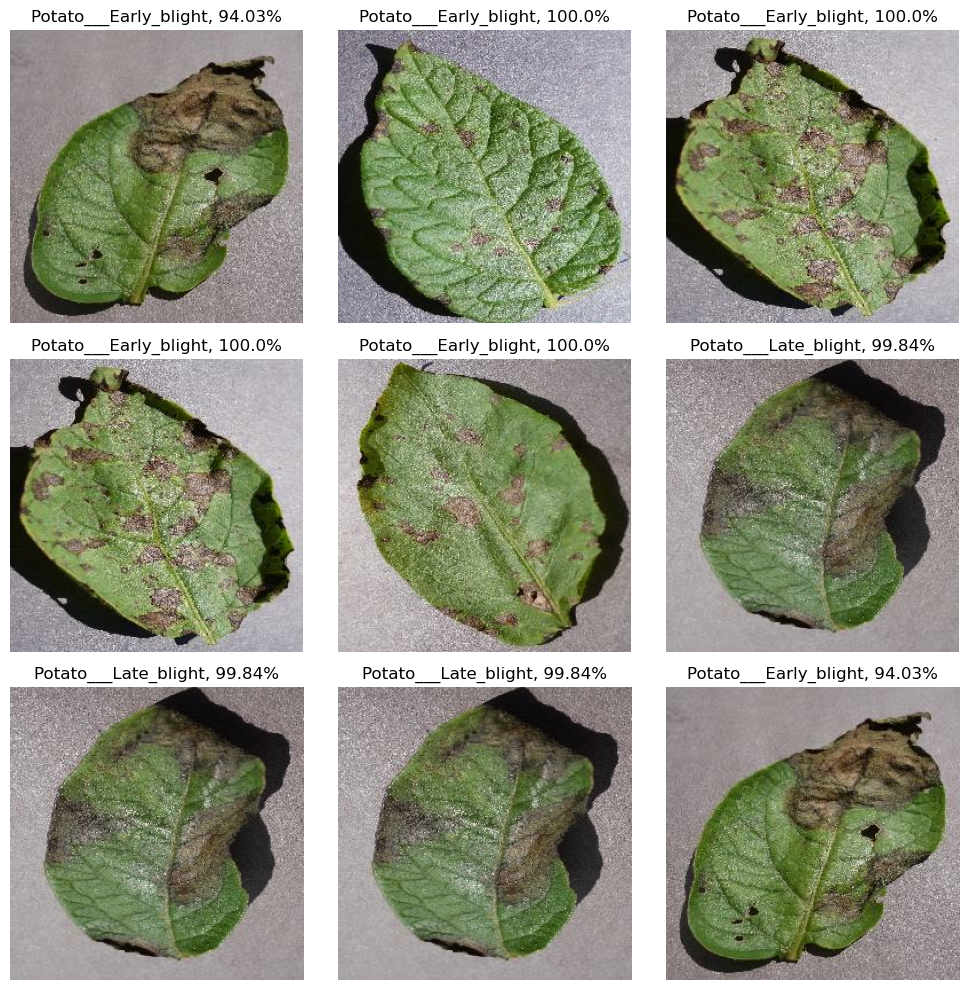

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the predict function that handles batch shapes correctly
def predict(model, img, class_names):
    # Ensure img has the correct shape before passing to model.predict
    if len(img.shape) == 3:  # If single image without batch dimension, expand dims
        img = tf.expand_dims(img, 0)

    # Make a prediction
    predictions = model.predict(img)

    # Retrieve the predicted label and confidence for the first image in the batch
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

# Iterate through one batch in the dataset
for img, label in test_ds.take(1):
    # Set up the 3x3 plot grid
    plt.figure(figsize=(10, 10))
    
    # Display up to 9 images in a 3x3 grid
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        random_index = np.random.randint(0, img.shape[0])  # Pick a random image in the batch

        # Predict and display each image with its prediction and confidence
        predicted_class, confidence = predict(model, img[random_index], class_names)
        
        # Plot the image with the predicted label and confidence
        plt.imshow(img[random_index].numpy().astype("uint8"))
        plt.title(f"{predicted_class}, {confidence}%")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()


In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [1]:
import tensorflow as tf

# Check if TensorFlow can detect GPUs
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("Available GPUs:")
    for gpu in gpus:
        # Display GPU name and details
        print(f"GPU Name: {gpu.name}")
        details = tf.config.experimental.get_device_details(gpu)
        print(f"  Memory Limit: {details.get('memory_limit', 'N/A')} bytes")
        print(f"  Compute Capability: {gpu.device_type}")
        print(f"  GPU Physical Device ID: {gpu}")
        print("="*50)
else:
    print("No GPUs detected.")


Available GPUs:
GPU Name: /physical_device:GPU:0
  Memory Limit: N/A bytes
  Compute Capability: GPU
  GPU Physical Device ID: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
